In [13]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [14]:
#showing the data
df=pd.read_csv('../input/usedcarscatalog/cars.csv')

In [15]:
df


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [16]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [17]:
#total missign values
print('Total Missing Value',df.isna().sum().sum())

Total Missing Value 10


In [18]:
print('Column with missing value',df.isna().sum().sum())

Column with missing value 10


In [19]:
print('Column with missing  values',df.columns[df.isna().sum()>0].values)

Column with missing  values ['engine_capacity']


In [23]:
df.columns[df.isna().sum()>0].values

array(['engine_capacity'], dtype=object)

In [25]:
#filling the engine_capacity with mean of that columns
df['engine_capacity']=df['engine_capacity'].fillna(df['engine_capacity'].mean())

In [26]:
df.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [27]:
#Encoding
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [29]:
#converting  boolean column int integer column
for column in df.columns:
    if df.dtypes[column]=='bool':
        df[column]=df[column].astype(np.int)
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [30]:
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,0,gasoline,2.5,...,1,1,1,0,1,0,1,1,1,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,0,gasoline,3.0,...,1,0,0,1,1,0,0,0,1,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,0,gasoline,2.5,...,1,0,0,0,0,0,0,1,1,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,0,gasoline,3.0,...,0,0,0,0,0,0,0,0,0,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,0,gasoline,2.5,...,1,0,1,1,0,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,0,gasoline,3.5,...,1,0,0,1,1,0,0,1,1,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,0,diesel,2.2,...,1,0,0,1,1,0,0,1,1,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,0,gasoline,3.5,...,1,0,0,1,1,0,0,1,1,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,0,gasoline,2.0,...,1,0,0,0,0,0,0,0,1,490


In [32]:
{column:len(df[column].unique()) for column in df.columns if df.dtypes[column]=='object'}

{'manufacturer_name': 55,
 'model_name': 1118,
 'transmission': 2,
 'color': 12,
 'engine_fuel': 6,
 'engine_type': 3,
 'body_type': 12,
 'state': 3,
 'drivetrain': 3,
 'location_region': 6}

In [33]:
#dropping the model_name
df=df.drop('model_name',axis=1)

In [35]:
df['transmission'].unique()

array(['automatic', 'mechanical'], dtype=object)

In [41]:
transmission_mapping={'automatic':0,'mechanical':1}

In [42]:
transmission_mapping

{'automatic': 0, 'mechanical': 1}

In [43]:
df['transmission']=df['transmission'].replace(transmission_mapping)

In [44]:
df['transmission']

0        0
1        0
2        0
3        1
4        0
        ..
38526    0
38527    1
38528    0
38529    1
38530    0
Name: transmission, Length: 38531, dtype: int64

In [50]:
#creating onehot_encode function
def onehot_encode(df,columns,prefixes):
    #copying the dataset
    df=df.copy()
    #looping through column name and prefix
    for column,prefix in zip(columns,prefixes):
        #creating dummies column from column name
        dummies=pd.get_dummies(df[column],prefix=prefix)
        #concating the dummies columns into original dataframe
        df=pd.concat([df,dummies],axis=1)
        #dropping the column
        df=df.drop(column,axis=1)
    #returning the column
    return df
    

In [51]:
onehot_column=[
    'manufacturer_name',
    'color',
    'engine_fuel',
    'body_type',
    'state',
    'drivetrain',
    'location_region'
]
onehot_prefixes=[
    'm',
    'c',
    'e',
    'b',
    's',
    'd',
    'l'
]

In [52]:
df=onehot_encode(
    df,columns=onehot_column,
    prefixes=onehot_prefixes)

In [53]:
df

,transmission,odometer_value,year_produced,engine_has_gas,engine_type,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,...,s_owned,d_all,d_front,d_rear,l_Брестская обл.,l_Витебская обл.,l_Гомельская обл.,l_Гродненская обл.,l_Минская обл.,l_Могилевская обл.
0,0,190000,2010,0,gasoline,2.5,0,10900.00,0,9,...,1,1,0,0,0,0,0,0,1,0
1,0,290000,2002,0,gasoline,3.0,0,5000.00,1,12,...,1,1,0,0,0,0,0,0,1,0
2,0,402000,2001,0,gasoline,2.5,0,2800.00,1,4,...,1,1,0,0,0,0,0,0,1,0
3,1,10000,1999,0,gasoline,3.0,0,9999.00,1,9,...,1,1,0,0,0,0,0,0,1,0
4,0,280000,2001,0,gasoline,2.5,0,2134.11,1,14,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,0,290000,2000,0,gasoline,3.5,0,2750.00,1,5,...,1,0,1,0,0,0,0,0,1,0
38527,1,321000,2004,0,diesel,2.2,0,4800.00,1,4,...,1,0,1,0,1,0,0,0,0,0
38528,0,777957,2000,0,gasoline,3.5,0,4300.00,0,3,...,1,0,1,0,0,0,0,0,1,0
38529,1,20000,2001,0,gasoline,2.0,0,4000.00,1,7,...,1,0,1,0,1,0,0,0,0,0


In [55]:
print('Remaining non_numeric column',(df.dtypes=='object').sum())

Remaining non_numeric column 1


In [56]:
#Encoding Labels
df['engine_type'].unique()

array(['gasoline', 'diesel', 'electric'], dtype=object)

In [57]:
label_mapping={'gasoline':0,
              'diesel':1,
              'electric':2}

In [58]:
df['engine_type']=df['engine_type'].replace(label_mapping)

In [59]:
df['engine_type']

0        0
1        0
2        0
3        0
4        0
        ..
38526    0
38527    1
38528    0
38529    0
38530    0
Name: engine_type, Length: 38531, dtype: int64

# Visualizing Correlations

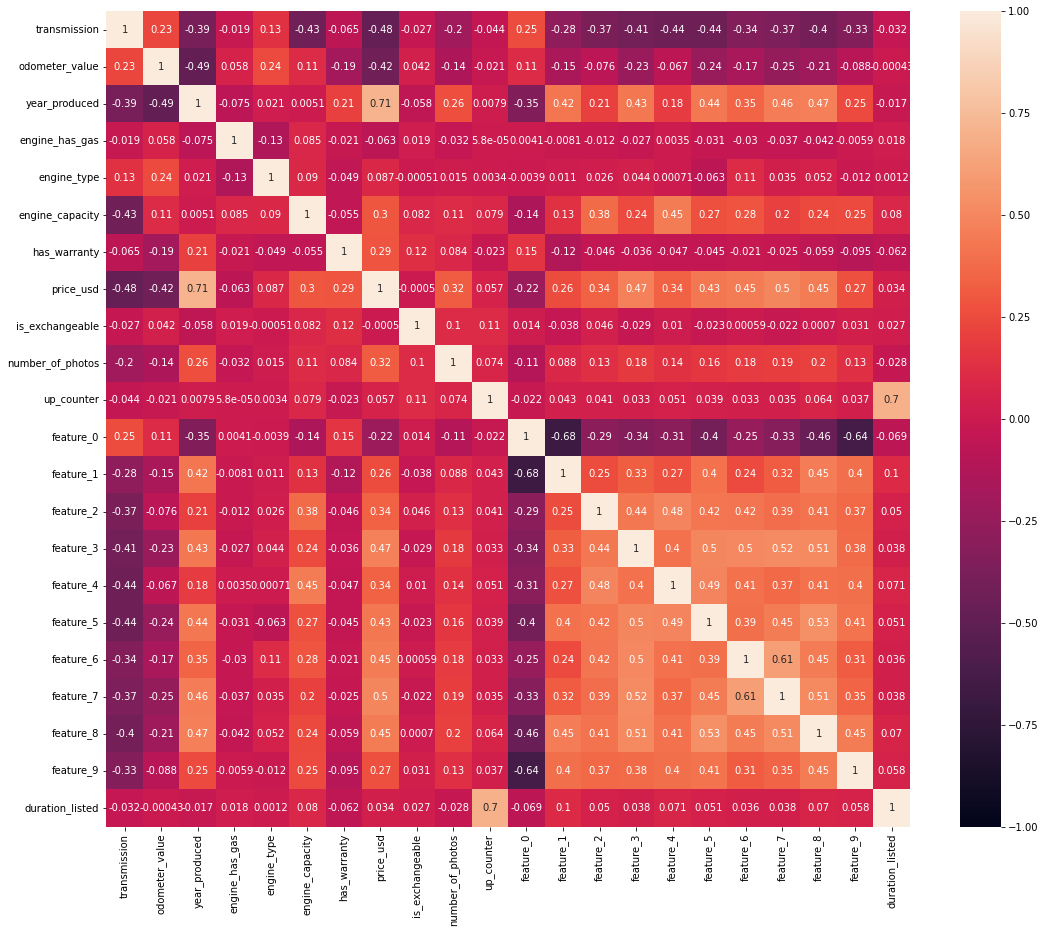

In [64]:
corr=df.loc[:,'transmission':'duration_listed'].corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True,vmin=-1.0,cmap='rocket')
plt.show()

In [65]:
#Splitting/Scaling the data
y=df['engine_type'].copy()
x=df.drop('engine_type',axis=1).copy()







In [66]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [68]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [69]:
x.shape

(38531, 118)

In [73]:
inputs=tf.keras.Input(shape=(118,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(3,activation='softmax')(x)
model=tf.keras.Model(inputs,outputs)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


history=model.fit(x_train,y_train,validation_split=0.2,batch_size=32,
                 epochs=100,callbacks=[tf.keras.callbacks.EarlyStopping(
                 monitor='val_loss',
                 patience=3,
                 restore_best_weights=True)])




2022-08-14 05:17:37.507333: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
675/675 [==============================] - 3s 3ms/step - loss: 0.0834 - accuracy: 0.9708 - val_loss: 0.0020 - val_accuracy: 0.9994
Epoch 2/100
675/675 [==============================] - 2s 3ms/step - loss: 3.9851e-04 - accuracy: 1.0000 - val_loss: 3.2880e-04 - val_accuracy: 1.0000
Epoch 3/100
675/675 [==============================] - 2s 3ms/step - loss: 1.0376e-04 - accuracy: 1.0000 - val_loss: 2.1211e-04 - val_accuracy: 1.0000
Epoch 4/100
675/675 [==============================] - 2s 3ms/step - loss: 4.9371e-05 - accuracy: 1.0000 - val_loss: 1.5947e-04 - val_accuracy: 1.0000
Epoch 5/100
675/675 [==============================] - 2s 3ms/step - loss: 2.6919e-05 - accuracy: 1.0000 - val_loss: 1.1831e-04 - val_accuracy: 1.0000
Epoch 6/100
675/675 [==============================] - 2s 3ms/step - loss: 1.6298e-05 - accuracy: 1.0000 - val_loss: 9.2625e-05 - val_accuracy: 1.0000
Epoch 7/100
675/675 [==============================] - 2s 3ms/step - loss: 1.0107e-05 - accuracy: 1.00

In [74]:
model.evaluate(x_test,y_test)

362/362 [==============================] - 1s 2ms/step - loss: 7.3044e-05 - accuracy: 0.9999


[7.304433529498056e-05, 0.9999135136604309]